# Медиаграмотность. Работа с данными.

Данные взяты здесь: https://www.kaggle.com/andrewmvd/udemy-courses

Данные иллюитрирую курсы на платформе https://www.udemy.com. 

Вопросы по данным:

- Как предмет из бесплатных курсов лучше всего себя показал?
- Какие курсы самые популярные?
- Какие курсы самые вовлекающие? 
- Есть ли взаимосвязь между курсами?
- С каких курсов наибольшая прибыль?

In [14]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Давайте посмотрим, сколько всего у нас данных:

In [15]:
print(len(df))

3678


Давайте посмотрим, по каким направлениям проводятся курсы:

In [16]:
df['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

Вывод: курсы на платформе Udemy проводятся по 4 направлениям: Веб разработка, бизнес финансы, музыкальная тематика и графический дизайн. 

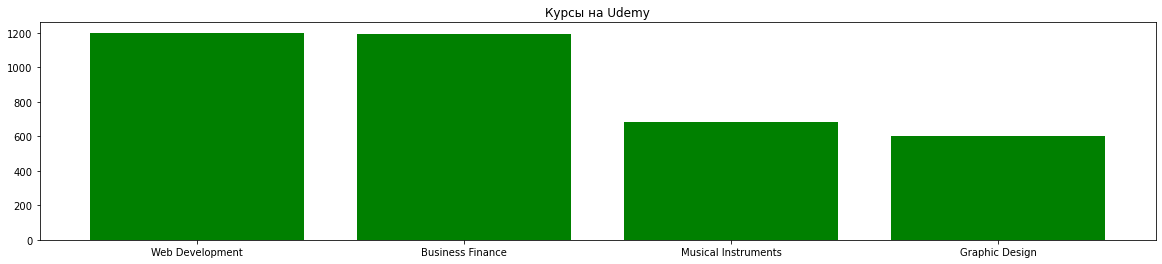

In [26]:
x = list(df['subject'].value_counts().index)
y = list(df['subject'].value_counts())
plt.figure(figsize=(20, 4))
plt.title('Курсы на Udemy')
plt.bar(x = x, height = y, color = 'green')
pass

Ответим на вопрос: какое направление по бесплатным курсам показывает себя лучше всего.

In [28]:
df_free = df[df['is_paid'] == False]
df_free.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.55,2017-03-23T22:19:57Z,Business Finance
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.50,2013-12-25T19:53:34Z,Business Finance
106,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,False,0,17160,620,23,All Levels,1.00,2014-08-29T20:10:38Z,Business Finance
108,923616,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,False,0,6811,151,51,All Levels,2.00,2016-08-05T17:03:15Z,Business Finance
112,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,False,0,19339,794,9,Beginner Level,2.00,2014-03-31T21:35:06Z,Business Finance


Посмотрим, сколько всего таких курсов:

In [29]:
len(df_free)

310

То есть бесплатные курсы составляют около 10% от всех курсов.

### Идея: посмотрим, какое максимальное количество людей записалось на бесплатный курс по каждому из направлений.




In [33]:
df_free_web = df_free[df_free['subject'] == 'Web Development']
df_free_business = df_free[df_free['subject'] == 'Business Finance']
df_free_music = df_free[df_free['subject'] == 'Musical Instruments']
df_free_design = df_free[df_free['subject'] == 'Graphic Design']

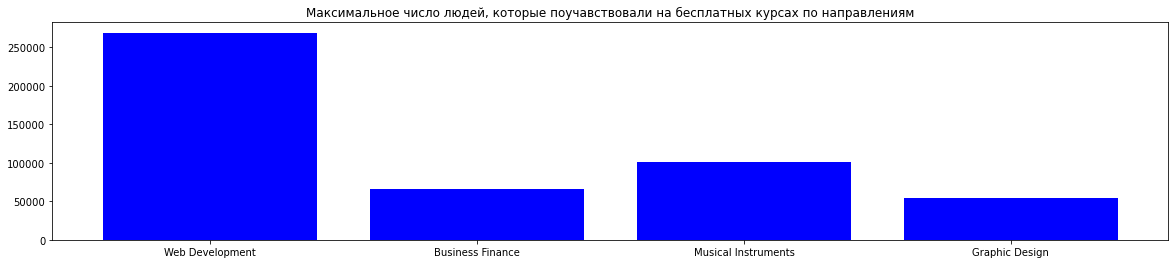

In [42]:
l = []
l.append(max(df_free_web['num_subscribers']))
l.append(max(df_free_business['num_subscribers']))
l.append(max(df_free_music['num_subscribers']))
l.append(max(df_free_design['num_subscribers']))
names = ['Web Development','Business Finance','Musical Instruments','Graphic Design']

plt.figure(figsize=(20, 4))
plt.title('Максимальное число людей, которые поучавствовали на бесплатных курсах по направлениям')
plt.bar(x = names, height = l, color = 'blue')
pass

### Также посмотрим на максимальное количество отзывов по этим направлениям.

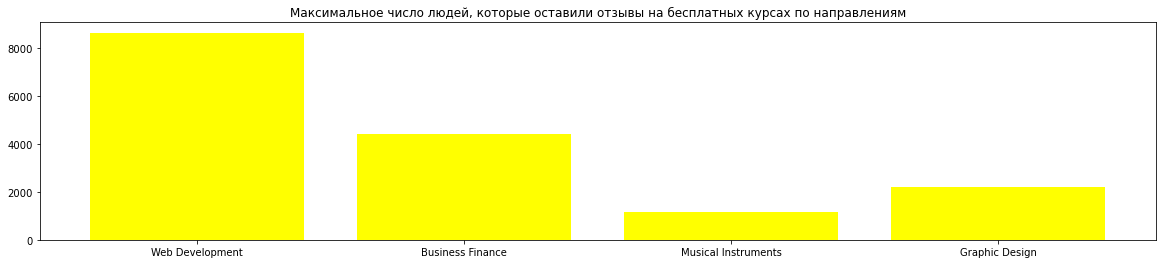

In [44]:
l = []
l.append(max(df_free_web['num_reviews']))
l.append(max(df_free_business['num_reviews']))
l.append(max(df_free_music['num_reviews']))
l.append(max(df_free_design['num_reviews']))
names = ['Web Development','Business Finance','Musical Instruments','Graphic Design']

plt.figure(figsize=(20, 4))
plt.title('Максимальное число людей, которые оставили отзывы на бесплатных курсах по направлениям')
plt.bar(x = names, height = l, color = 'yellow')
pass

### Давайте также посмотрим на относительную метрику. Поясним это:

Какие-то курсы могли запуститься недавно и по ним просто не успело собраться много отзывов и посещений. Поэтому посмотрим на отношение посещений к отзывам.

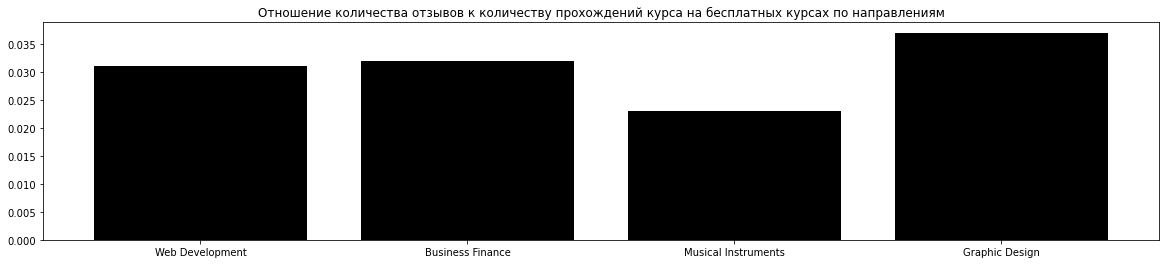

In [78]:
from statistics import mean

r_web = list(df_free_web['num_reviews'])
s_web = list(df_free_web['num_subscribers'])
q_web = []
for i in range(len(r_web)):
    q_web.append(round(r_web[i] / s_web[i],3))

q_web_avg = round(mean(q_web),3)

r_business = list(df_free_business['num_reviews'])
s_business = list(df_free_business['num_subscribers'])
q_business = []
for i in range(len(r_business)):
    q_business.append(round(r_business[i] / s_business[i],3))

q_business_avg = round(mean(q_business),3)

r_music = list(df_free_music['num_reviews'])
s_music = list(df_free_music['num_subscribers'])
q_music = []
for i in range(len(r_music)):
    q_music.append(round(r_music[i] / s_music[i],3))

q_music_avg = round(mean(q_music),3)

r_design = list(df_free_design['num_reviews'])
s_design = list(df_free_design['num_subscribers'])
q_design = []
for i in range(len(r_design)):
    q_design.append(round(r_design[i] / s_design[i],3))

q_design_avg = round(mean(q_design),3)

q = [q_web_avg,q_business_avg,q_music_avg,q_design_avg ]

names = ['Web Development','Business Finance','Musical Instruments','Graphic Design']

plt.figure(figsize=(20, 4))
plt.title('Отношение количества отзывов к количеству прохождений курса на бесплатных курсах по направлениям')
plt.bar(x = names, height = q, color = 'black')
pass

# Посмотрим, какую прибыль суммарно и максимально получила платформа с курсов по данным направлениям:

In [89]:
sum(df[df['subject'] == 'Web Development']['price'])

92440

In [90]:
sum(df[df['subject'] == 'Business Finance']['price'])

81920

In [91]:
sum(df[df['subject'] == 'Musical Instruments']['price'])

33700

In [92]:
sum(df[df['subject'] == 'Graphic Design']['price'])

34870

Вывод: за все время с курсов по Веб разработке и бизнес финансам было заработано больше всего денег. 

## Вывод: по данным, которые посмотрели можно заметить:

- Курсы по Веб разработке принесли большую часть прибыли, бесплатные курсы этого направления хорошо вовлекают людей.
- Курсы по бизнес - финансам хорошо конвертировали прибыль, но как бесплатные курсы заходят на порядок хуже. 
- Курсы по музыкальным инструментам пока являются отстающими на фоне остальных курсов.
- Курсы по графическому дизайну имеет хороший отклик. 

Очевидно, что важно понимать изменение тенденции на курсы по годам. 

In [100]:
years = []
for x in list(df['published_timestamp']):
    years.append(x.split('-')[0])
df['years'] = years
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,years
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016


In [104]:
data = df[df['subject'] == 'Business Finance']
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,years
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016


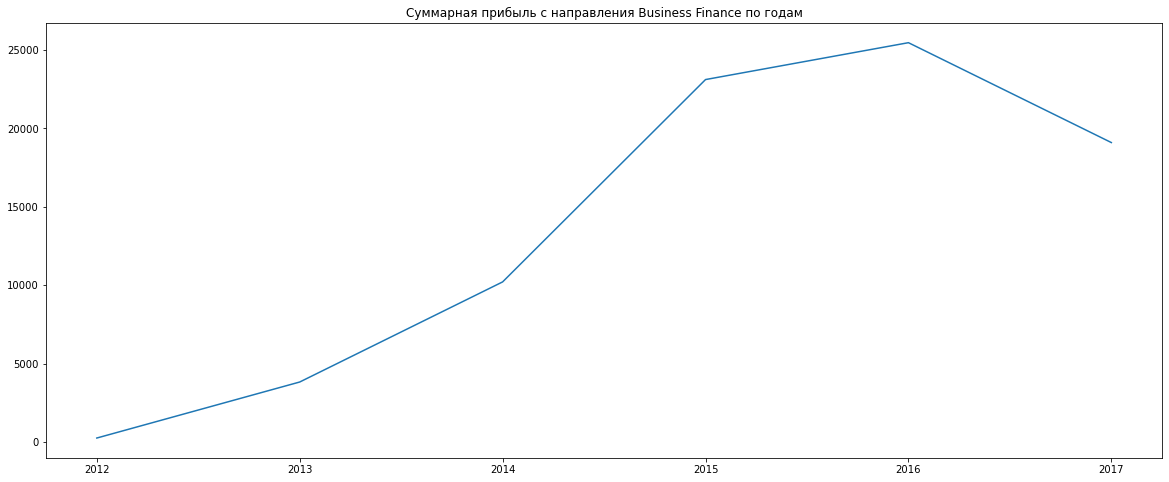

In [118]:
money = data[['years','price']].groupby(by = ['years']).sum()
plt.figure(figsize=(20, 8))
plt.title('Суммарная прибыль с направления Business Finance по годам')
plt.plot(money.index,money.values)
pass

## По графику видно:

что с 2012 года по 2016 прибыль компании с курсов по бизнес-финансам росла, а в 2017 пошла наспад. Для компании имеет смысл разобраться, с чем было связано такое изменение. 

NB: Аналогичную аналитику можно провести по остальным направлениям (посмотреть как изменяется прибыль по годам)

## Сразу можно задаться вопросом: 

А как менялась прибыль компании в целом по годам? 

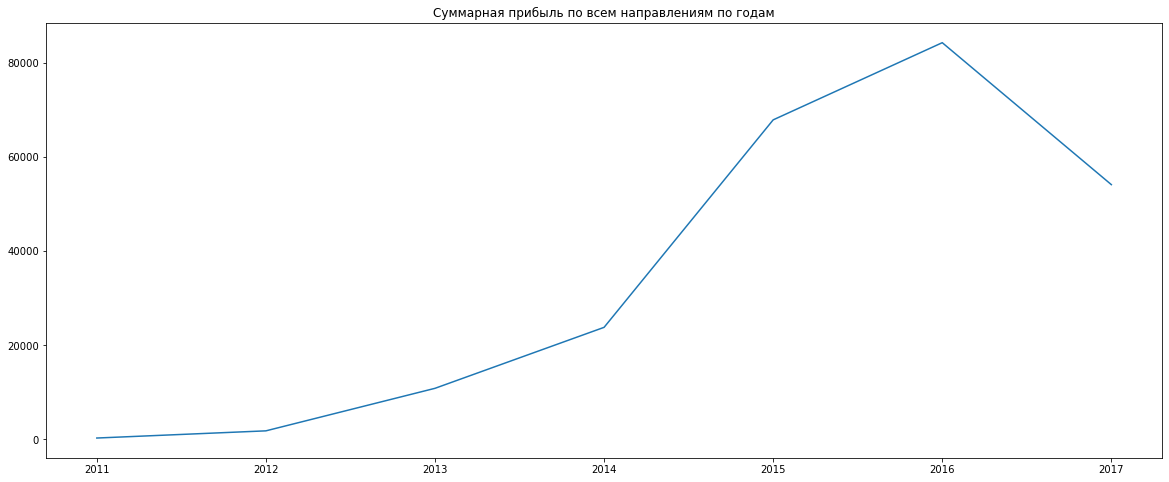

In [119]:
money = df[['years','price']].groupby(by = ['years']).sum()
plt.figure(figsize=(20, 8))
plt.title('Суммарная прибыль по всем направлениям по годам')
plt.plot(money.index,money.values)
pass

Тенденция распространяется на общую прибыль компании. Прибыль компании падает с 2016 по 2017 года. 

# Давайте посмотрим на нелидирующие направления по курсам:

Поэтому посмотрим аналогичную статистику по Graphic Design по годам.

In [120]:
data = df[df['subject'] == 'Graphic Design']
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,years
1195,880202,Anatomy and Figure Drawing for Beginners,https://www.udemy.com/anatomy-and-figure-drawi...,True,150,2252,240,111,Beginner Level,21.0,2016-06-20T15:31:48Z,Graphic Design,2016
1196,1197206,Illustrator CC MasterClass,https://www.udemy.com/illustrator-cc-masterclass/,True,95,462,50,86,All Levels,12.0,2017-05-02T16:41:21Z,Graphic Design,2017
1197,1117796,Typographic Logo Design in Illustrator - Begin...,https://www.udemy.com/typographical-logo-design/,True,150,1720,40,27,All Levels,1.5,2017-02-23T21:40:39Z,Graphic Design,2017
1198,1219520,Adobe Illustrator T-Shirt Design for Merch by ...,https://www.udemy.com/merchbyamazondesign/,True,20,390,44,15,All Levels,1.0,2017-06-13T20:41:14Z,Graphic Design,2017
1199,595876,Logo Design in Adobe Illustrator - for Beginne...,https://www.udemy.com/logodesign/,True,200,4297,337,110,All Levels,7.5,2015-10-01T21:40:39Z,Graphic Design,2015


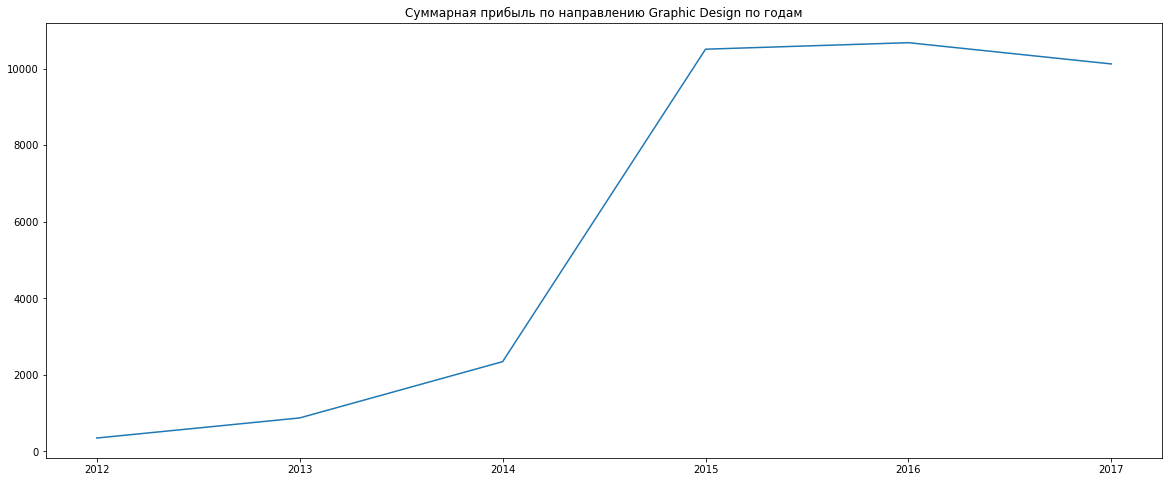

In [121]:
money = data[['years','price']].groupby(by = ['years']).sum()
plt.figure(figsize=(20, 8))
plt.title('Суммарная прибыль по направлению Graphic Design по годам')
plt.plot(money.index,money.values)
pass

Видно, что по графическому дизайну нет сильной просадки за 2017 год.